<h1>Crime and Weather<h1>
<h2>Graphs and Exploratory Analysis<h2>
<h3>Lauren Paredes<h3>



In [60]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

Read in both crime and weather into data frames using pandas.

In [61]:
crimeDF= pd.read_csv("crime.csv", encoding='windows-1254')
weatherDF = pd.read_csv("weather_data_long.csv")


Clean up and trim down the dataframes

In [62]:
del weatherDF['Time']
del weatherDF["WinSpeed"]
del weatherDF["Pressure"]
del weatherDF["Humidity"]
del weatherDF["Wind"]
del weatherDF["DewPoint"]
del weatherDF["WindGust"]
del weatherDF["Precip."]
del weatherDF["Condition"]

In [63]:
# need the occurance date to be in the format of datetime
crimeDF['Date'] = pd.to_datetime(crimeDF["FIRST_OCCURRENCE_DATE"]).dt.date
# crimeDF.rename(columns={'OCCURRENCE_DATE':'Date'},inplace =True)

In [64]:
del crimeDF["incident_id"]
del crimeDF["offense_id"]
del crimeDF["OFFENSE_CODE"]
del crimeDF["OFFENSE_CODE_EXTENSION"]
del crimeDF["FIRST_OCCURRENCE_DATE"]
del crimeDF["LAST_OCCURRENCE_DATE"]
del crimeDF["REPORTED_DATE"]
del crimeDF["VICTIM_COUNT"]
del crimeDF["GEO_X"]
del crimeDF["GEO_Y"]
del crimeDF["GEO_LON"]
del crimeDF["GEO_LAT"]
del crimeDF["DISTRICT_ID"]
del crimeDF["PRECINCT_ID"]
del crimeDF["NEIGHBORHOOD_ID"]
del crimeDF["IS_CRIME"]
del crimeDF["IS_TRAFFIC"]
del crimeDF["INCIDENT_ADDRESS"]

In [65]:
# Making sure both dataframes have a common col to merge on with the correct datatype
crimeDF['Date']= pd.to_datetime(crimeDF['Date'])
weatherDF['Date']= pd.to_datetime(weatherDF['Date'])

In [66]:
# Set the temperature for the average divided by group
weatherDF= weatherDF.groupby(['Date']).max()

<h3> Merging crime and weather on a common date<h3>

In [67]:
mergeOnDate = pd.merge(crimeDF, weatherDF, how='outer',on='Date')
mergeOnDate=mergeOnDate.dropna(subset=['OFFENSE_TYPE_ID'])
mergeOnDate=mergeOnDate.dropna(subset=['Temperature'])
mergeOnDate['Temperature'] =mergeOnDate['Temperature'].astype('int')
display(mergeOnDate)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,Date,Temperature
0,criminal-mischief-other,public-disorder,2017-06-25,73
1,criminal-mischief-other,public-disorder,2017-06-25,73
2,criminal-mischief-other,public-disorder,2017-06-25,73
3,criminal-mischief-other,public-disorder,2017-06-25,73
4,criminal-mischief-other,public-disorder,2017-06-25,73
...,...,...,...,...
379047,fraud-by-use-of-computer,white-collar-crime,2019-01-14,43
379048,fraud-by-use-of-computer,white-collar-crime,2019-01-14,43
379049,pawn-broker-viol,all-other-crimes,2019-01-14,43
379050,outside-steal-recovered-veh,all-other-crimes,2019-01-14,43


<h2>Graphs<h2>

In [68]:
graphJoin =mergeOnDate
graphJoin['Year'] = pd.DatetimeIndex(graphJoin['Date']).year
graphJoin['Month'] = pd.DatetimeIndex(graphJoin['Date']).month

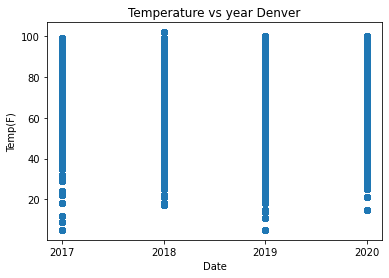

In [69]:
plt.scatter(graphJoin['Year'],graphJoin['Temperature'])
plt.title("Temperature vs year Denver")

plt.xticks(np.arange( min(graphJoin["Year"]) , max(graphJoin["Year"]+1 ),1.0))
plt.xlabel("Date")
plt.ylabel("Temp(F)")
plt.show()

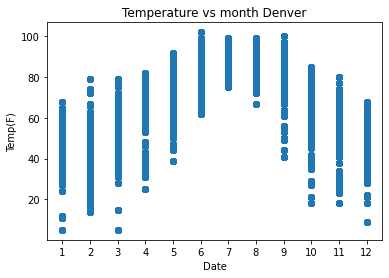

In [70]:
plt.scatter(graphJoin['Month'],graphJoin['Temperature'])
plt.title("Temperature vs month Denver")

plt.xticks(np.arange( min(graphJoin["Month"]) , max(graphJoin["Month"]+1 ),1.0))
plt.xlabel("Date")
plt.ylabel("Temp(F)")
plt.show()

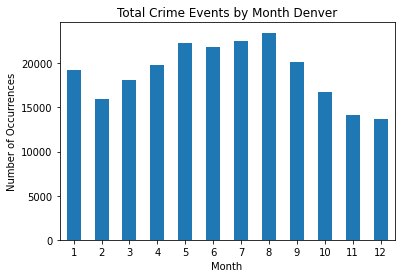

In [71]:
ax = graphJoin.groupby("Month").size().plot(kind = "bar", title= "Total Crime Events by Month Denver")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

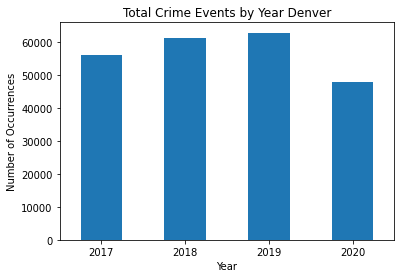

In [72]:
ax = graphJoin.groupby("Year").size().plot(kind = "bar", title= "Total Crime Events by Year Denver")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

Assigning crime types in terms of society, person, property. This categorization logic is explained in report.

In [73]:
types ={'auto-theft': 'property',
        'robbery': 'property',
        'arson': 'property',
        'theft-from-motor-vehicle': 'property',
        'burglary': 'property',
        'larceny': 'property',
        'sexual-assault': 'person',
        'drug-alcohol':'society',
        'other-crimes-against-persons': 'person',
        'aggravated-assault': 'person',
        'murder': 'person',
        'white-collar-crime': 'society',
        'public-disorder': 'society',
        'all-other-crimes': 'society'}

In [74]:
mergeOnDate["OFFENSE_CATEGORY_ID"] = mergeOnDate["OFFENSE_CATEGORY_ID"].map(types)
display(mergeOnDate)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,Date,Temperature,Year,Month
0,criminal-mischief-other,society,2017-06-25,73,2017,6
1,criminal-mischief-other,society,2017-06-25,73,2017,6
2,criminal-mischief-other,society,2017-06-25,73,2017,6
3,criminal-mischief-other,society,2017-06-25,73,2017,6
4,criminal-mischief-other,society,2017-06-25,73,2017,6
...,...,...,...,...,...,...
379047,fraud-by-use-of-computer,society,2019-01-14,43,2019,1
379048,fraud-by-use-of-computer,society,2019-01-14,43,2019,1
379049,pawn-broker-viol,society,2019-01-14,43,2019,1
379050,outside-steal-recovered-veh,society,2019-01-14,43,2019,1


Separate into hot, mild, cold dataframes

In [75]:
hotDays = mergeOnDate[mergeOnDate['Temperature'] > 80]
mildDays = mergeOnDate[(mergeOnDate['Temperature'] >= 50) & (mergeOnDate['Temperature'] <= 80)]
coldDays = mergeOnDate[mergeOnDate['Temperature'] < 50]

numofweathercrimes = len(mergeOnDate.index)
print("Total Entry Count: ",numofweathercrimes)
print("Hot days overview")
display(hotDays)
print("Mild days overview")
display(mildDays)
print("cold days overview")
display(coldDays)

Total Entry Count:  228089
Hot days overview


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,Date,Temperature,Year,Month
347,criminal-mischief-other,society,2017-06-27,96,2017,6
348,criminal-mischief-other,society,2017-06-27,96,2017,6
349,criminal-mischief-other,society,2017-06-27,96,2017,6
350,criminal-mischief-other,society,2017-06-27,96,2017,6
351,criminal-mischief-other,society,2017-06-27,96,2017,6
...,...,...,...,...,...,...
377513,theft-unauth-use-of-ftd,society,2018-07-02,94,2018,7
377514,fraud-by-use-of-computer,society,2018-07-02,94,2018,7
377515,fraud-by-use-of-computer,society,2018-07-02,94,2018,7
377516,fraud-by-use-of-computer,society,2018-07-02,94,2018,7


Mild days overview


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,Date,Temperature,Year,Month
0,criminal-mischief-other,society,2017-06-25,73,2017,6
1,criminal-mischief-other,society,2017-06-25,73,2017,6
2,criminal-mischief-other,society,2017-06-25,73,2017,6
3,criminal-mischief-other,society,2017-06-25,73,2017,6
4,criminal-mischief-other,society,2017-06-25,73,2017,6
...,...,...,...,...,...,...
377019,theft-of-motor-vehicle,property,2018-04-08,63,2018,4
377020,theft-of-motor-vehicle,property,2018-04-08,63,2018,4
377021,drug-forgery-to-obtain,society,2018-04-08,63,2018,4
377022,drug-forgery-to-obtain,society,2018-04-08,63,2018,4


cold days overview


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,Date,Temperature,Year,Month
2034,criminal-mischief-other,society,2017-04-01,40,2017,4
2035,criminal-mischief-other,society,2017-04-01,40,2017,4
2036,criminal-mischief-other,society,2017-04-01,40,2017,4
2037,criminal-mischief-other,society,2017-04-01,40,2017,4
2038,criminal-mischief-other,society,2017-04-01,40,2017,4
...,...,...,...,...,...,...
379047,fraud-by-use-of-computer,society,2019-01-14,43,2019,1
379048,fraud-by-use-of-computer,society,2019-01-14,43,2019,1
379049,pawn-broker-viol,society,2019-01-14,43,2019,1
379050,outside-steal-recovered-veh,society,2019-01-14,43,2019,1


<h4>General distributions of crime types on different temperature categories<h4>

In [76]:
# overall merged data counts
print("All Data grouped by categoryID counts")
crimetypes = mergeOnDate.groupby(["OFFENSE_CATEGORY_ID"]).size()
print(crimetypes.head())
print(mergeOnDate.shape)

All Data grouped by categoryID counts
OFFENSE_CATEGORY_ID
person       29619
property    105089
society      93381
dtype: int64
(228089, 6)


In [77]:
# category types on hot days from the hotDays dataframe
print("Hot Data grouped by categoryID counts")
hotTypes=hotDays.groupby(["OFFENSE_CATEGORY_ID"]).size()
print(hotTypes.head())
print(hotDays.shape)


Hot Data grouped by categoryID counts
OFFENSE_CATEGORY_ID
person       9834
property    34876
society     29991
dtype: int64
(74701, 6)


In [78]:
# category types on mild days from the mildDays dataframe
print("Mild Data grouped by categoryID counts")
mildTypes =mildDays.groupby(["OFFENSE_CATEGORY_ID"]).size()
print(mildTypes.head())
print(mildDays.shape)

Mild Data grouped by categoryID counts
OFFENSE_CATEGORY_ID
person      13786
property    48464
society     44205
dtype: int64
(106455, 6)


In [79]:
# category types on cold days from the coldDays dataframe
print("Cold Data grouped by categoryID counts")
coldTypes = coldDays.groupby(["OFFENSE_CATEGORY_ID"]).size()
print(coldTypes.head())
print(coldDays.shape)

Cold Data grouped by categoryID counts
OFFENSE_CATEGORY_ID
person       5999
property    21749
society     19185
dtype: int64
(46933, 6)


In [80]:
pdisHot=(hotTypes/numofweathercrimes)*100
pdisCold=(coldTypes/numofweathercrimes)*100
pdisMild = (mildTypes/numofweathercrimes)*100
print("General Disributions for type and temperature")
print("Hot general Distribution:")
display(pdisHot)
print("Mild general Distribution:")
display(pdisMild)
print("Cold general Distribution:")
display(pdisCold)

General Disributions for type and temperature
Hot general Distribution:


OFFENSE_CATEGORY_ID
person       4.311475
property    15.290523
society     13.148815
dtype: float64

Mild general Distribution:


OFFENSE_CATEGORY_ID
person       6.044132
property    21.247846
society     19.380593
dtype: float64

Cold general Distribution:


OFFENSE_CATEGORY_ID
person      2.630114
property    9.535313
society     8.411190
dtype: float64

<h3>Bayesian Classifications<h3>

P(Category|Temp) = /frac{(P(C and T))}{P(T)}`

P(Category) is represented by a series with Person, Property, and Society crimes
P(Temperature) is represented by a series with Hot, Mild, and Cold days

In [81]:
# def calculateClassPropbs(dataset):
#     numDataPoint = dataset.size
#     classProbs= {}
#     for dataPoint in 

In [82]:
priorCategories = (crimetypes / (numofweathercrimes))
print("Prior Probabilities of Categories")
display(priorCategories)
print("Sum of percentages of Categories: ",priorCategories.sum())



Prior Probabilities of Categories


OFFENSE_CATEGORY_ID
person      0.129857
property    0.460737
society     0.409406
dtype: float64

Sum of percentages of Categories:  1.0


In [83]:
pHot = ((hotDays.shape[0])/numofweathercrimes)
pMild= ((mildDays.shape[0])/numofweathercrimes)
pCold=((coldDays.shape[0])/numofweathercrimes)
d = {'Hot':pHot, 'Mild':pMild,'Cold':pCold}
priorTemperatures= pd.Series(data=d, index=['Hot','Mild','Cold'])
print("Probabilities of Temperatures")
display(priorTemperatures)
print("Sum of percentages of Temperatures",priorTemperatures.sum())

Probabilities of Temperatures


Hot     0.327508
Mild    0.466726
Cold    0.205766
dtype: float64

Sum of percentages of Temperatures 1.0


P(T|C)= P(T and C)* P(C)

In [84]:

pHotTypes=(hotTypes/hotDays.shape[0])*100
pColdTypes=(coldTypes/coldDays.shape[0])*100
pMildTypes = (mildTypes/mildDays.shape[0])*100
print("Given a hot day probability of a type of crime: ")
print("Total sum: ", pHotTypes.sum())
display(pHotTypes)
print("Given a mild day probability of a type of crime: ")
print("Total sum: ", pColdTypes.sum())
display(pColdTypes)
print("Given a cold day probability of a type of crime: ")
print("Total sum: ", pMildTypes.sum())
display(pMildTypes)
# display(hotTypes.sum())




Given a hot day probability of a type of crime: 
Total sum:  100.0


OFFENSE_CATEGORY_ID
person      13.164482
property    46.687461
society     40.148057
dtype: float64

Given a mild day probability of a type of crime: 
Total sum:  100.0


OFFENSE_CATEGORY_ID
person      12.782051
property    46.340528
society     40.877421
dtype: float64

Given a cold day probability of a type of crime: 
Total sum:  100.0


OFFENSE_CATEGORY_ID
person      12.950073
property    45.525339
society     41.524588
dtype: float64